<a href="https://colab.research.google.com/github/Bjoyita/ImageFilters/blob/main/Filters_Compare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRARIES**

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.filters import difference_of_gaussians, window
from scipy.fft import fftn, fftshift

# Microstructure 1

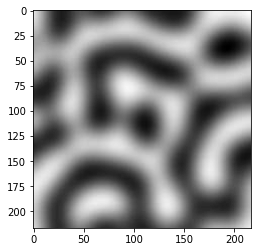

In [ ]:
im = io.imread('im1_blur.jpg')
plt.imshow(im, cmap = 'gray')

In [ ]:
im.shape

(217, 217)

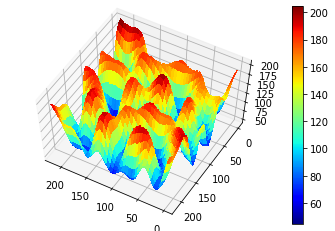

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(0, 217)
Y = np.arange(0,217)

X, Y = np.meshgrid(X, Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, im, cmap='jet',
                       linewidth=0, antialiased=False)
ax.view_init(60,120)
fig.colorbar(surf)

plt.show()
 


In [ ]:
print(im)

[[192 189 184 ... 206 206 208]
 [192 189 184 ... 206 206 206]
 [192 188 184 ... 205 206 204]
 ...
 [182 178 174 ... 188 190 192]
 [182 179 174 ... 190 193 193]
 [184 181 176 ... 192 193 195]]


In [ ]:
#create an open grid for our image
x,y = np.ogrid[0:217, 0:217]

In [ ]:
x

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [ ]:
y

array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

**Calculating the 2D Fourier Transform of The Image**

*https://thepythoncodingbook.com/2021/08/30/2d-fourier-transform-in-python-and-fourier-synthesis-of-images/*
The Fourier transform works out the amplitude, frequency, orientation, and phase of a sinusoidal grating. The further away the dots are from the centre, the higher the frequency. The brighter they are, the more prominent that grating is in the image as it has a higher amplitude. And the orientation of each pair of dots in relation to the centre represents the orientation of the gratings. The phase is also encoded in the Fourier transform

# FOURIER TRANSFORM TO DETECT EDGES

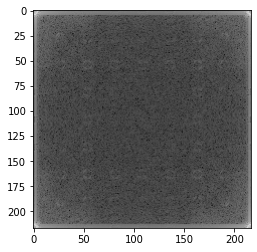

In [ ]:
im1_F = np.fft.fft2(im)
plt.imshow(np.log(abs(im1_F)), cmap ='gray')

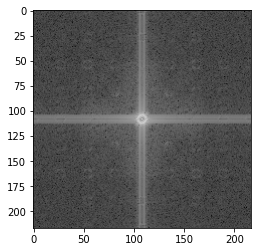

In [ ]:
im1_F_02 = np.fft.fftshift(im1_F)
plt.imshow(np.log(abs(im1_F_02)), cmap ='gray')


In [ ]:
nx, ny = im1_F_02.shape

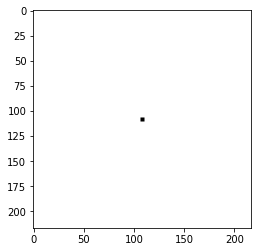

In [ ]:
mask_h = np.ones((nx,ny), np.uint8) # mask should have the same dimension as that of the image
center_x = nx/2
center_y = ny/2

# OPEN GRID
x, y = np.ogrid[:nx, :ny]
circle_mask = (x-center_x)**2 + (y-center_y)**2 <= 2.5**2
mask_h[circle_mask] = 0

plt.imshow(mask_h, cmap ='gray')

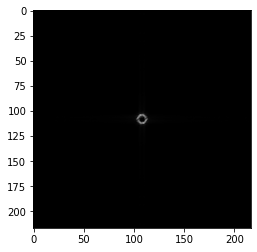

In [ ]:
im1_F_02_c= im1_F_02.copy()

#black out the center by applying high frequency mask
im1_F_02_h = im1_F_02_c* mask_h 

#show the image
plt.imshow(abs(im1_F_02_h), cmap ='gray')

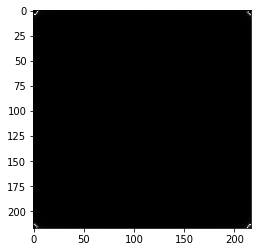

In [ ]:
im1_F_02_originBack = np.fft.ifftshift(im1_F_02_h)
plt.imshow(abs(im1_F_02_originBack), cmap ='gray')

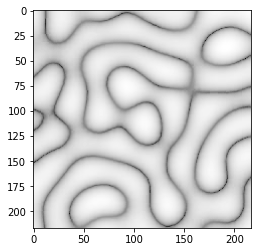

In [ ]:
originalImage = np.fft.ifft2(im1_F_02_originBack)
plt.imshow(np.log(abs(originalImage)), cmap ='gray')

**When edge detection is the aim, use small radius mask to identify proper edges**

In [ ]:
from skimage import filters
Sharpimg = filters.unsharp_mask(im, radius = 50.0, amount = 1.0)

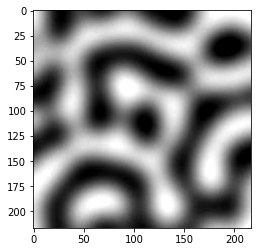

In [ ]:
plt.imshow(Sharpimg, cmap ='gray')

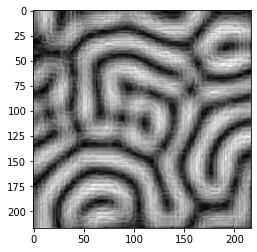

In [ ]:
from skimage.filters import sobel,sobel_v, sobel_h, roberts
im1_sobel = sobel(im)


#fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,10))
plt.imshow(im1_sobel, cmap='gray')


In [ ]:
im1_sobel.shape

(217, 217)

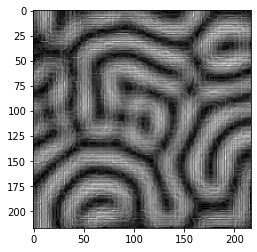

In [ ]:
im1_roberts = roberts(im)
plt.imshow(im1_roberts, cmap='gray')

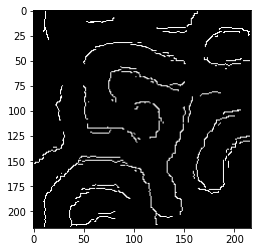

In [ ]:
from skimage.feature import canny
#img_c =[]
#for sigma in range(1,4,1):
im1_canny= canny(im)
  #img_c.append(im1_canny)
plt.imshow(im1_canny, cmap ='gray')


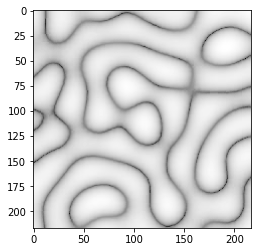

In [ ]:
plt.imshow(np.log(abs(originalImage)), cmap ='gray')

**Comparison of different image filters for edge detection**

Text(0.5, 1.0, 'Canny filter')

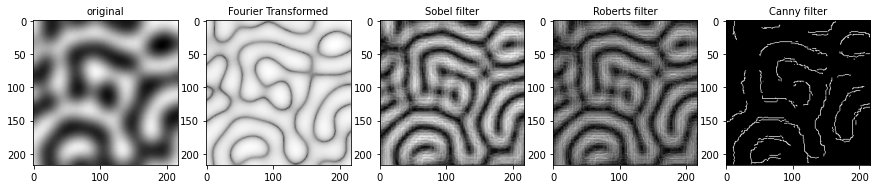

In [ ]:
fig, ax = plt.subplots(1, 5, figsize =(15,15))

ax[0].imshow(im, cmap ='gray')
ax[0].set_title("original", fontsize = 10)
ax[1].imshow(np.log(abs(originalImage)), cmap ='gray')
ax[1].set_title("Fourier Transformed", fontsize = 10)
ax[2].imshow(im1_sobel, cmap ='gray')
ax[2].set_title("Sobel filter", fontsize = 10)
ax[3].imshow(im1_roberts, cmap ='gray')
ax[3].set_title("Roberts filter", fontsize = 10)
ax[4].imshow(im1_canny, cmap ='gray')
ax[4].set_title("Canny filter", fontsize = 10)